## Kaggle Competition: Classifying Cyberbullying 

https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification

##### - Backgound:
With social media use becoming more prevalent at every age, the ubiquity of social media means cyberbullying can effectively affect anyone, anytime, anywhere.
##### - Target:
In order to prevent the spread of cyberbullying, it may be an effective way to use models to detect whether there is cyberbullying in the message and give timely warnings.
##### - Data set:
This project is about the analysis of tweets about cyberbullying. The dataset contains more than 47000 tweets labelled according to the class of cyberbullying:
- Age
- Ethnicity
- Gender
- Religion
- Other type of cyberbullying
- Not cyberbullying

#### Table of Contents
1. EDA Procedure

2. Model building and training: Unsupervised learning VS Supervised learning

3. Conclution

In [1]:
#https://www.kaggle.com/code/jhoward/nb-svm-strong-linear-baseline
#https://github.com/MartinaSus/TextAnalytics_UniPi_2021-22
#https://www.kaggle.com/code/vincentgupo/classifying-cyberbullying-94-accuracy

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing Data
train = pd.read_csv('cyberbullying_tweets.csv')

### 1. EDA Procedure




1.1 Inspect, Visualize and Clean the Data

1.2 Words extraction from text: word_tokenize, stopwords and WordNetLemmatizer by NLTK

1.3 Vectorisation: TFIDF

#### 1.1 Inspect, Visualize and Clean the Data

#Check data type, any None or Duplicates

In [6]:
# Check data type, any None
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [7]:
# Check data type, any None
train.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


#Visualizations for the distribution of cyberbullying type

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64


<AxesSubplot:>

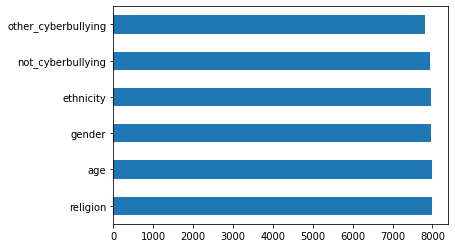

In [9]:
print(train['cyberbullying_type'].value_counts())
train['cyberbullying_type'].value_counts().plot(kind='barh')#.plot.bar()

In [10]:
# Check for duplicates in articles
print('- lenth of training data:',len(train))
print('- Sum of None:')
print(train.isna().sum())
print('- Sum of Duplicates:',len(train[train['tweet_text'].duplicated()]))

- lenth of training data: 47692
- Sum of None:
tweet_text            0
cyberbullying_type    0
dtype: int64
- Sum of Duplicates: 1675


#We found 1675 duplicate articles. So do the data clean,delete the duplicates

In [11]:
# delete the duplicates
train = train.drop_duplicates(subset=['tweet_text'])

#### 1.2 Words extraction from text: word_tokenize, stopwords and WordNetLemmatizer by NLTK


- NLTK: Natural Language Tool Kit, A leading platform for building Python programs to work with human language data.

- word_tokenize: Tokenize and tag text

- Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by stop words.

- WordNetLemmatizer : Lemmatization is to remove the affixes of words and extract the main part of words. For example, the lemmatized word "cars" is "car", and the lemmatized word "ate" is "eat".

In [13]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet') #

In [14]:
#punctuation remove setting
import string
Punctuation = string.punctuation
Punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#Split_Word

step 1: Convert text to lowercase and tokenize it using nltk
 
step 2: remove punctuation items
 
step 3: remove stop words which load form NLTK
 
step 4:Lemmatization

In [15]:
def Split_Word(Text,return_str=True):
    # step 1: Convert text to lowercase and tokenize it using nltk
    TokenText = word_tokenize(Text.lower())  
    # step 2: remove punctuation items
    TextWithoutPunc = [word for word in TokenText if word not in Punctuation]  
    # step 3: remove stop words which load form NLTK
    stops = set(stopwords.words("english"))
    TextWithoutDeac = [word for word in TextWithoutPunc if word not in stops]  
    
    # step 4:Lemmatization
    TextAfterLemmatize = [] 
    lemmatizer = WordNetLemmatizer()
    for word in TextWithoutDeac:
        TextAfterLemmatize.append(lemmatizer.lemmatize(lemmatizer.lemmatize(word, pos='v'), pos='n'))  
    if return_str:
        return ' '.join(TextAfterLemmatize) # return string for Scikit learn Vectorization
    else:
        return TextAfterLemmatize

In [16]:
train['tweet_text'] = train['tweet_text'].apply(lambda x : Split_Word(x) )

#Visualizations for text length distribution for each tweet message

<AxesSubplot:>

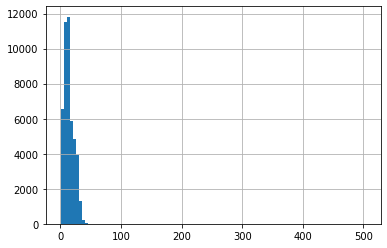

In [18]:
train['Text_len'] = train['tweet_text'].apply(lambda x : len(x.split(' ')))
train['Text_len'].hist(bins=100)

#Visualizations for the mean text length of each article in different cyberbullying type

<AxesSubplot:ylabel='cyberbullying_type'>

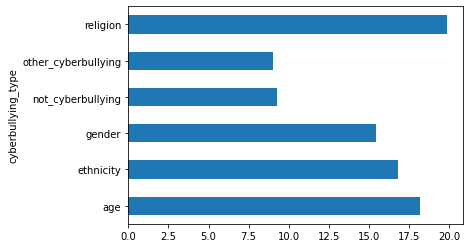

In [19]:
train.groupby(['cyberbullying_type'])['Text_len'].mean().plot.barh()

#Creating word cloud for each Cyberbullying type

In [21]:
from wordcloud import WordCloud

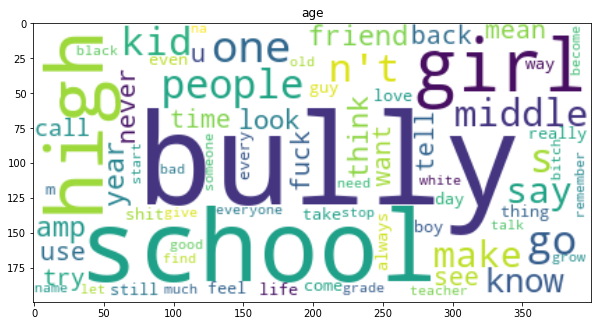

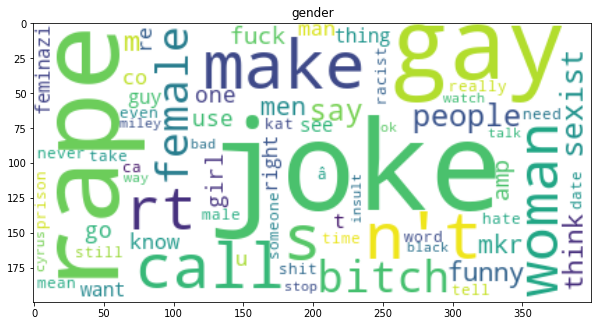

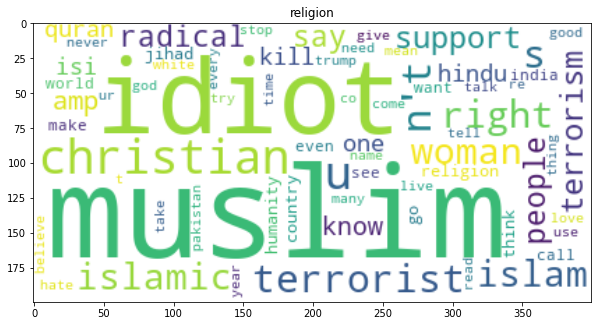

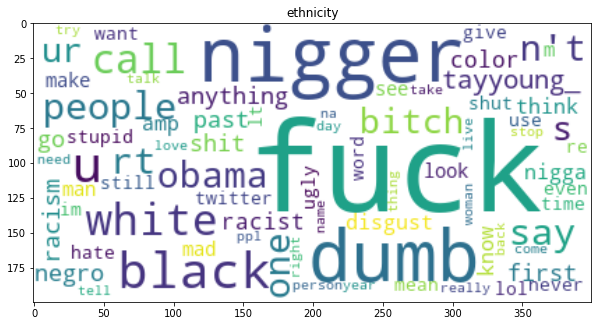

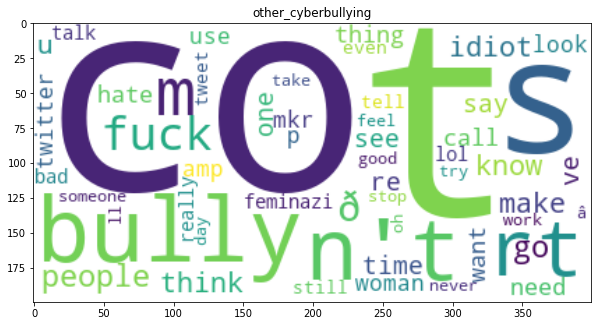

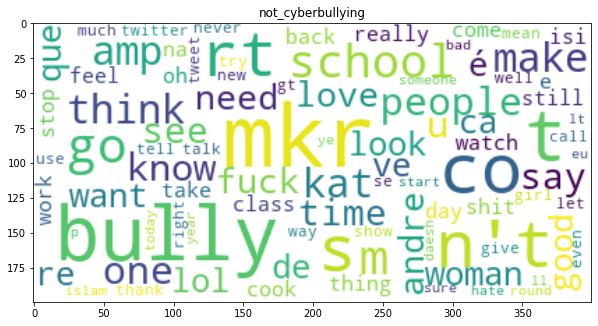

In [22]:
categories = ['age', 'gender', 'religion', 'ethnicity',
              'other_cyberbullying','not_cyberbullying']

for cate in categories:
    temp_df = train[train['cyberbullying_type']==cate]
    string = (temp_df['tweet_text']+' ').sum()
    wordcloud = WordCloud(
            background_color ='white',
            min_font_size = 10,
            collocations=False,
                ).generate(string)

    # 繪圖
    plt.figure(figsize=(10,8))
    plt.title(cate)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

#Because at the end we will use the same data to compare unsupervised learning with supervised learning, We split the Train data into training and testing data in advance to avoid data leakage in supervised learning

In [24]:
x_train, x_test, y_train, y_test = train_test_split(train[['tweet_text']], train['cyberbullying_type'], test_size=0.33, random_state=42)

#### 1.3 Vectorisation: TFIDF

TF-IDF for a word in a document is calculated by multiplying two different metrics:

- TF : The term frequency of a word in a document:  count of instances a word appears in a document. 

- IDF : The inverse document frequency of the word across a set of documents. This means, how common or rare a word is in the entire document set. This metric can be calculated by taking the total number of documents, dividing it by the number of documents that contain a word, and calculating the logarithm.

Multiplying these two numbers results in the TF-IDF score of a word in a document. The higher the score, the more relevant that word is in that particular document.

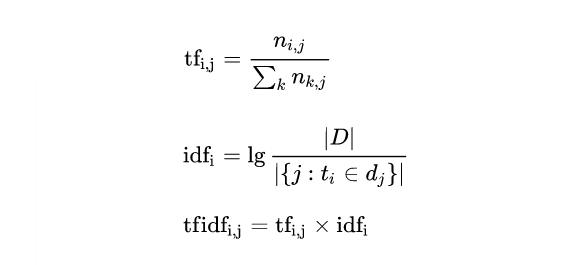

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

Vectorisation by TfidfVectorizer from scikit learn

We can use max_features to set the number of columns, but according to the scikit learn documents,it's only consider the top max_features ordered by term frequency across the corpus, not based on the TFIDF value.

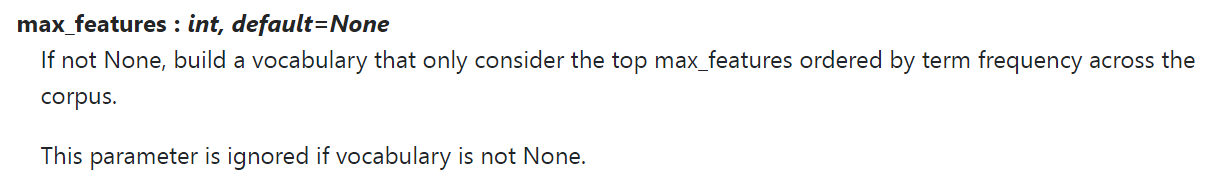

So here we use TfidfVectorizer to get the TFIDF matrix which contains all words in training data,then sum up the TFIDF values by each word, and take out the top 5000 to reduce the dimension of the data.

In [26]:
# 1. Vectorisation by TfidfVectorizer from scikit learn
vectoriser = TfidfVectorizer() #max_features=5000
x_train_vec = vectoriser.fit_transform(x_train['tweet_text'])
x_test_vec = vectoriser.transform(x_test['tweet_text'])

# 2. Sum up the TFIDF values for each words, and select the top 5000 to reduce the dimension of the data
train_top_tfidf = np.array(np.argsort(x_train_vec.sum(axis=0)))[0][-5000:]
train_top_tfidf_columns = np.array(vectoriser.get_feature_names())[train_top_tfidf]

x_train_vec = x_train_vec.tocsr()[:,train_top_tfidf]
x_test_vec = x_test_vec.tocsr()[:,train_top_tfidf]

x_train_tfidf = pd.DataFrame(x_train_vec.todense(),columns = train_top_tfidf_columns)
x_test_tfidf = pd.DataFrame(x_test_vec.todense(),columns = train_top_tfidf_columns)  

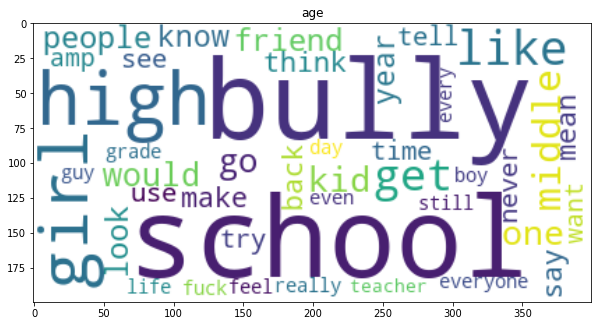

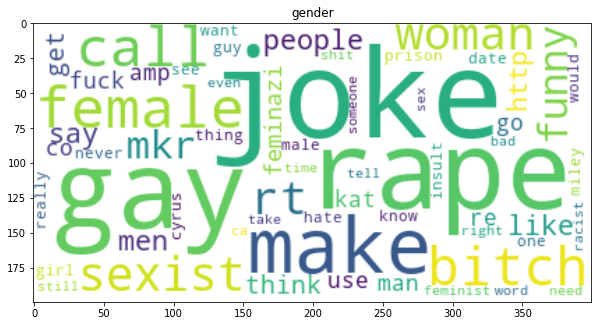

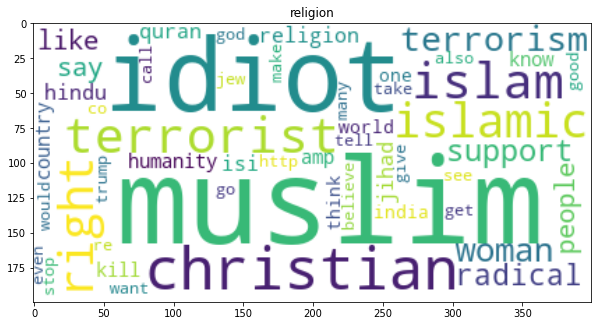

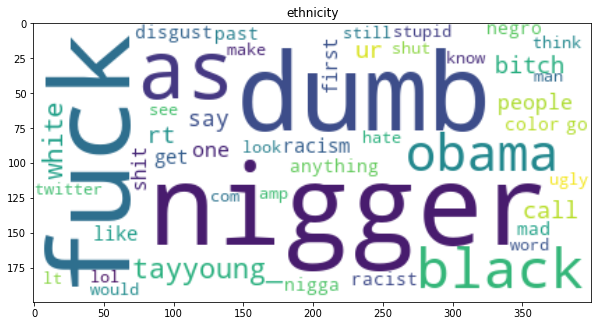

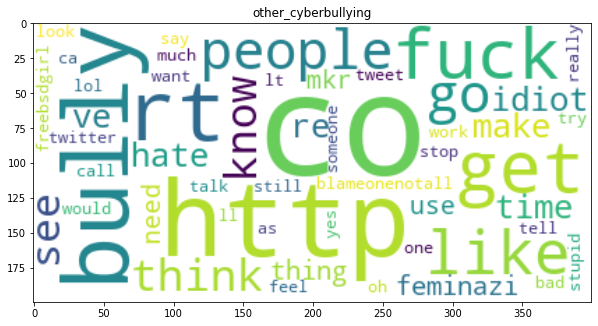

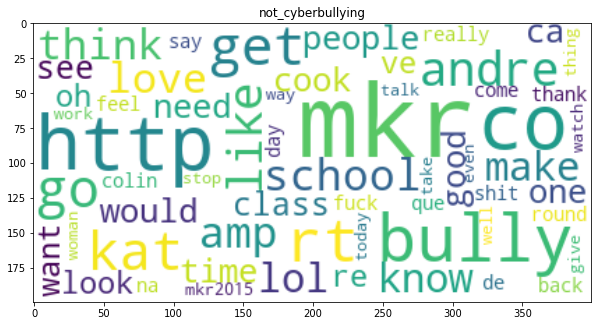

In [28]:
categories = ['age', 'gender', 'religion', 'ethnicity',
              'other_cyberbullying','not_cyberbullying']

for cate in categories:
    dic = x_train_tfidf[(y_train==cate).to_list()].sum().to_dict()
    wordcloud = WordCloud(
            background_color ='white',
            min_font_size = 10,
            collocations=False
                ).generate_from_frequencies(dic)

    # 繪圖
    plt.figure(figsize=(10,8))
    plt.title(cate)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

### 2. Model building and training: Unsupervised learning VS Supervised learning

    2.1 Unsupervised learning : NMF,Kmeans

    2.2 Supervised learning : MultinomialNB,RandomForestClassifier



#### 2.1 Unsupervised learning : NMF

1. Training the NMF model by train data

2. Transform test data,that each row in the test data will reduce from thousands of columns(words) to 6 columns (which is the amount of categories) through the trained NMF model.

3. Predict: Select the column with the maximum value of each row as its group

4. Compare the labels: Since the true catogries is string and the predict data type is number, We need to change predict to  catogries label for scorling. So I test all combinations that convert numbers to categories , select the one which can get the highest accuracy score with the predict as the result

5. Find the best parameters from mutiple parameters combinations.


In [29]:
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools

In [30]:
def sort_predict(nmf_matrix):
    sorted_index = np.argsort(nmf_matrix)
    return np.array([sorted_index[i][-1] for i in range(len(nmf_matrix))])

In [31]:
def compare_labels(y_ture,y_pred):
    best_dict = {}
    best_accuracy = 0
    for nums in itertools.permutations(range(len(categories))):
        cyberbullying_type2num_dict = {i:j for i,j in zip(nums,categories)}
        y_pred_label = [cyberbullying_type2num_dict[i] for i in y_pred]
        accuracy = accuracy_score(y_ture,y_pred_label)

        if accuracy>best_accuracy:
            best_dict = cyberbullying_type2num_dict
            best_accuracy = accuracy
    print('best_accuracy:' , best_accuracy)
    return best_dict,best_accuracy

In [32]:
def print_confmatrix(y_test,y_pred):
    conf_matrix = pd.DataFrame(confusion_matrix(y_test,y_pred,labels=categories),
                columns = categories,
                index = categories)
    return conf_matrix

In [33]:
para_list = [["frobenius", "cd"], 
             ["frobenius", "mu"], 
             ["kullback-leibler", "mu"]
            ]

# Find the best parameters from mutiple parameters combinations.
best_accuracy=0
best_dict ={}
para_best = ''
y_test_pred = []
for para in para_list:
    print(para)
    # 1. Training the NMF model by train data
    m = NMF(n_components=len(categories),beta_loss = para[0],solver=para[1])
    m.fit(x_train_vec)
    # 2. Transform test data
    nmf_matrix = m.transform(x_test_vec)
    # 3. Predict
    pred = sort_predict(nmf_matrix)
    # 4. Compare the labels
    dic,accu = compare_labels(y_test,pred)
    if accu>best_accuracy:
        best_accuracy=accu
        best_dict = dic
        para_best = para
        y_test_pred = pred
print('=========Result=========')
print('para_best:', para_best)
print('test_accuracy:', best_accuracy)
print_confmatrix(y_test , [best_dict[i] for i in y_test_pred])

['frobenius', 'cd']
best_accuracy: 0.5585407612274463
['frobenius', 'mu']
best_accuracy: 0.5868563150269985
['kullback-leibler', 'mu']
best_accuracy: 0.5658501251152377
=========Result=========
para_best: ['frobenius', 'mu']
test_accuracy: 0.5868563150269985


,age,gender,religion,ethnicity,other_cyberbullying,not_cyberbullying
age,2507,10,41,5,20,33
gender,39,1295,315,33,256,639
religion,3,13,2391,3,127,14
ethnicity,6,4,716,1634,47,252
other_cyberbullying,286,61,939,116,428,221
not_cyberbullying,410,62,1080,54,469,657


#### 2.1 Unsupervised learning : KMeans

1. Training the KMeans model by train data with N categories
2. Predict the test data
3. Compare the labels: Since the true catogries is string and the predict data type is number, We need to change predict to  catogries label for scorling. So I test all combinations that convert numbers to categories , select the one which can get the highest accuracy score with the predict as the result

In [35]:
from sklearn.cluster import KMeans

In [36]:
kmeans = KMeans(n_clusters=len(categories), random_state=0).fit(x_train_vec)
# y_test_pred = kmeans.labels_
y_test_pred = kmeans.predict(x_test_vec)
best_dict,best_accuracy = compare_labels(y_train,kmeans.labels_)
y_test_pred = [best_dict[i] for i in y_test_pred]


print('test_accuracy:', accuracy_score(y_test,y_test_pred))
print_confmatrix(y_test,y_test_pred)

best_accuracy: 0.6021536764944374
test_accuracy: 0.6071381535624918


,age,gender,religion,ethnicity,other_cyberbullying,not_cyberbullying
age,2160,2,0,0,6,448
gender,5,1206,4,10,7,1345
religion,0,0,1648,1,17,885
ethnicity,0,2,4,1585,256,812
other_cyberbullying,79,5,44,14,18,1891
not_cyberbullying,84,7,23,9,6,2603


#### 2.2 Supervised learning : MultinomialNB

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).
This model assumes a complex multinomial distribution of features, which is a very typical text classification model with smoothing parameters α inside the model.
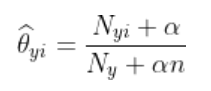

Here we found the best α by accuracy core

In [38]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
# find the best α by accuracy core
best_accuracy=0
y_test_pred = []
best_alpha = 0
for i in range(1,21,1):
    a = 0.05*i
    NB = MultinomialNB(alpha=a).fit(x_train_vec,y_train)
    NB.fit(x_train_vec,y_train)
    pred = NB.predict(x_test_vec)
    accu = accuracy_score(pred, y_test)
    if accu> best_accuracy:
        best_accuracy = accu
        y_test_pred  = pred
        best_alpha = a
print('best_alpha:',best_alpha)        
print("accuracy_score:",accuracy_score(y_test_pred, y_test)*100)
print_confmatrix(y_test,y_test_pred)

best_alpha: 0.35000000000000003
accuracy_score: 77.11049650994337


,age,gender,religion,ethnicity,other_cyberbullying,not_cyberbullying
age,2510,12,23,17,13,41
gender,39,2093,57,70,111,207
religion,21,24,2433,17,6,50
ethnicity,77,19,89,2433,20,21
other_cyberbullying,297,156,123,171,901,403
not_cyberbullying,382,166,285,108,451,1340


#### 2.3 Supervised learning : RandomForestClassifier

Here we use GridSearchCV to find the best hyperparameters for RandomForest

GridSearchCV consists of two parts, GridSearch and Cross-Validation

- GridSearch: Exhaustive search over specified parameter values for an estimator.

- Cross-Validation: Train data partitioned into k equally sized folds. Subsequently k iterations of training and validation are performed such that within each iteration a different fold of the data is held-out for validation while the remaining k − 1 folds are used for learning

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [41]:
tuned_parameter = [{
                    'min_samples_split': range(2,6,2),
                    'max_depth': range(50,100,10),
                    
                  }]
#設置交叉驗證
clf = GridSearchCV(estimator=RandomForestClassifier(),
                   param_grid=tuned_parameter, 
                   cv=3)
clf.fit(x_train_vec,y_train)

print('Best parameters:')
print(clf.best_params_)

y_test_pred = clf.predict(x_test_vec)
print("accuracy_score:",accuracy_score(y_test_pred, y_test)*100)
print_confmatrix(y_test,y_test_pred)

Best parameters:
{'max_depth': 90, 'min_samples_split': 2}
accuracy_score: 84.53839062294219


,age,gender,religion,ethnicity,other_cyberbullying,not_cyberbullying
age,2553,2,1,0,21,39
gender,1,2132,6,1,124,313
religion,0,3,2433,4,26,85
ethnicity,0,2,3,2621,25,8
other_cyberbullying,12,97,6,16,1091,829
not_cyberbullying,35,90,108,8,483,2008


### 3. Conclution

- Unsupervised learning : Has a good effect on the classification of topics, but it does not have a good ability to identify whether there is bullying. I think it's because unsupervised learning only clusters by the distance between the data, and the distance difference between "topic" is more obvious than "If there is bullying".

- Supervised learning : Makes up for unsupervised learning shortcoming. Not only effectively classify "topics", but also has the ability to identify "If there is cyberbullying". Among these models, the performance of RandomForest is the best(84.5%). I think it's because its capability to handle the high dimensional data and high performance under imbalanced datasets are significant advantages over other machine learning models.

Depending on the purpose, used different models to achieve:

- In actual situation, the topics of tweets message must be more than these four categories. If we want to classify topics without labels, unsupervised learning is a good choice.
- If we put more emphasis on judging "whether there is bullying", Supervised learning would be more effective.